In [1]:
import pandas as pd 
import requests as rq
import numpy as np
import collections

In [2]:
#matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mlp
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import rcParams

In [3]:
#getting the speech from the url
website_url = rq.get('https://lopezobrador.org.mx/2018/12/01/ceremonia-de-entrega-del-baston-de-mando-y-primer-discurso-a-la-nacion/').text

In [4]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(website_url, "lxml")

In [5]:
#retriving text from "p" founds
data = [element.text for element in soup.find_all("p")]
#convert tu string
data = str(data)
data

"['Comunicado 003', 'Pueblos indígenas de todas las culturas tendrán atención preferente del gobierno federal, anuncia presidente López Obrador en el Zócalo', 'Ciudad de México, 1° de diciembre de 2018.- La atención especial a pueblos indígenas encabeza los cien primeros compromisos asumidos este día por el presidente de México, Andrés Manuel López Obrador, en el Zócalo capitalino.', '', 'En el marco de la ceremonia de entrega del Bastón de Mando en la que una representación de las diversas culturas de pueblos indígenas, pueblos originarios y afromexicanos ungieron al nuevo mandatario con el símbolo de la confianza de que mandará obedeciendo, López Obrador tomó la palabra y expresó:', '“Después de la purificación a la investidura presidencial por los pueblos indígenas de México, diría, para resumir, en una frase, lo que buscamos, lo que anhelamos, la purificación de la vida pública de México. Reafirmo puntualmente los compromisos. En primer lugar, vamos a dar atención especial a los pu

In [6]:
# Reading data I found "xa0'" as a word, so I replace this with space
data = data.replace(u'\\xa0', u' ')
data

"['Comunicado 003', 'Pueblos indígenas de todas las culturas tendrán atención preferente del gobierno federal, anuncia presidente López Obrador en el Zócalo', 'Ciudad de México, 1° de diciembre de 2018.- La atención especial a pueblos indígenas encabeza los cien primeros compromisos asumidos este día por el presidente de México, Andrés Manuel López Obrador, en el Zócalo capitalino.', '', 'En el marco de la ceremonia de entrega del Bastón de Mando en la que una representación de las diversas culturas de pueblos indígenas, pueblos originarios y afromexicanos ungieron al nuevo mandatario con el símbolo de la confianza de que mandará obedeciendo, López Obrador tomó la palabra y expresó:', '“Después de la purificación a la investidura presidencial por los pueblos indígenas de México, diría, para resumir, en una frase, lo que buscamos, lo que anhelamos, la purificación de la vida pública de México. Reafirmo puntualmente los compromisos. En primer lugar, vamos a dar atención especial a los pu

In [7]:
#words that we want to ignore
from stop_words import get_stop_words
#spanish stop words
stop_words_es = get_stop_words('es')

In [8]:
from wordcloud import WordCloud, STOPWORDS

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [9]:
stop_words = ["año", "mil", "pesos", "ciento", "millones", "tres", "ustedes"] + stop_words_es

amlo_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stop_words
)
#generate wordcloud
amlo_wc.generate(data)

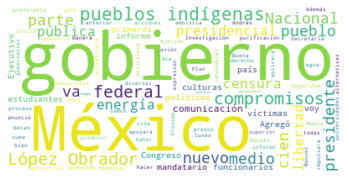

In [10]:
#display the WordCloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

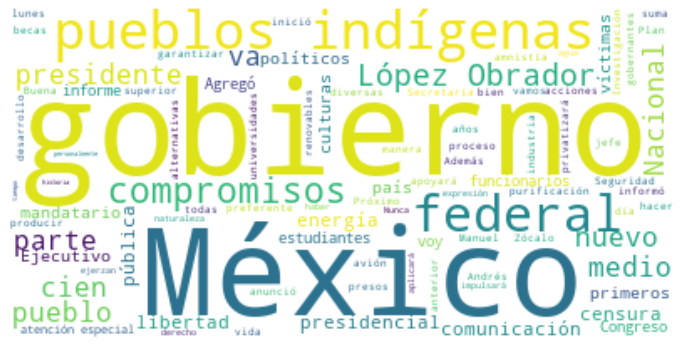

In [11]:
#re generate the word cloud
amlo_wc.generate(data)

#display the cloud
fig = plt.figure()
#set width
fig.set_figwidth(12)
#set height
fig.set_figheight(16)

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

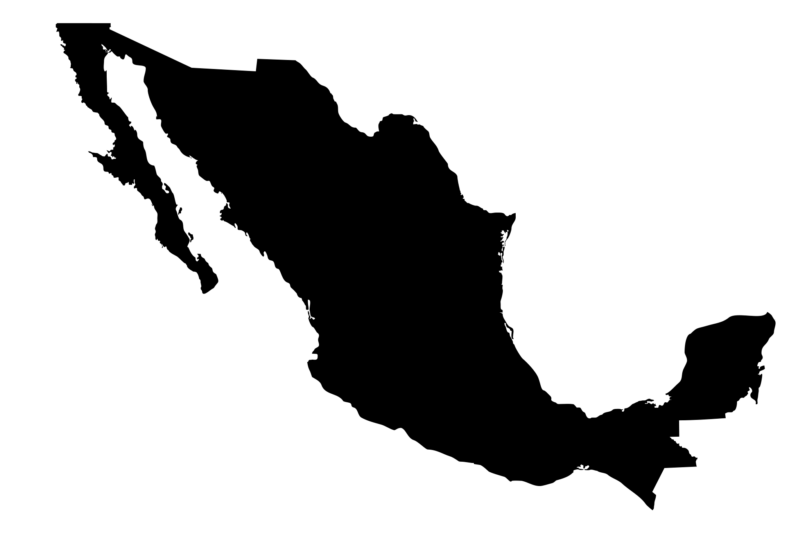

In [12]:
mx_mask = np.array(Image.open('mx-map.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, vmin=255, vmax=255, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
amlo_wc_mx = WordCloud(background_color='white', max_words=300, mask=mx_mask, stopwords=stop_words)

amlo_wc_mx.generate(data)

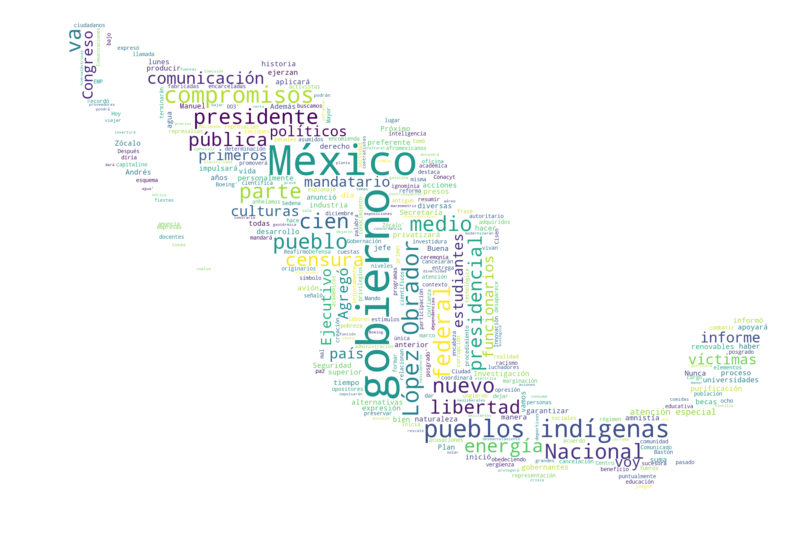

In [14]:
fig_mx = plt.figure()
fig_mx.set_figwidth(14) # set width
fig_mx.set_figheight(18) # set height


plt.imshow(amlo_wc_mx, interpolation='bilinear')
plt.axis('off')
plt.show()